# Table of Contents

1. [Importing Necessary Libraries](#importing-necessary-libraries)
2. [Load Datasets](#load-datasets)
3. [Exploratory Data Analysis](#exploratory-data-analysis)
4. [Data Preprocessing](#data-preprocessing)
5. [Feature Selection](#feature-selection)
6. [Model Implementation](#model-implementation)
7. [Model Evaluation](#model-evaluation)
8. [Model Comparison Report](#model-comparison-report)
9. [Conclusion](#conclusion)
10. [Challenges Faced Report](#challenges-faced-report)
11. [Business Case](#business-case)

### To predict Flight Prices based on the given input features

# Objectives

- **Predictive Accuracy:** Develop models that accurately predict flight prices based on various features.
- **Market Insights:** Identify key factors that influence flight prices.
- **Decision Support:** Provide a tool to assist customers and airlines in making informed decisions regarding flight pricing and planning.


In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

from statistics import mode
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge,LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from kerastuner import HyperModel, RandomSearch

In [2]:
df = pd.read_excel('Flight_Fare.xlsx')

df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Domain Analysis

In [3]:
with open('data_description.txt', 'r', encoding='utf-8') as file:
     for line in file:
        print(line, end='') 

Feature Information:-

1.Airline: So this column will have all the types of airlines like Indigo, Jet Airways, Air India, and many more.
2.Date_of_Journey: This column will let us know about the date on which the passenger’s journey will start.
3.Source: This column holds the name of the place from where the passenger’s journey will start.
4.Destination: This column holds the name of the place to where passengers wanted to travel.
5.Route: Here we can know about what the route is through which passengers have opted to travel from his/her source to their destination.
6.Arrival_Time: Arrival time is when the passenger will reach his/her destination.
7.Duration: Duration is the whole period that a flight will take to complete its journey from source to destination.
8.Total_Stops: This will let us know in how many places flights will stop there for the flight in the whole journey.
9.Additional_Info: In this column, we will get information about food, kind of food, and other amenities.
10.P

# Basic Checks

In [4]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df.shape

(10683, 11)

In [8]:
df.size

117513

In [9]:
df.ndim

2

In [10]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

# Insights
 - This dataset contains 10683 records, 10 feature columns and 1 target column
 - The dataset have a total of 117513 entries.


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [12]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [13]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.duplicated().sum()

220

# Insights
 - Route column has 1 missing value
 - Total_Stops has 1 missing value
 - 220 Duplicate records.

In [15]:
# Dropping duplicated cells

df = df.drop_duplicates()
df.duplicated().sum()

0

# Descriptive Statistics

In [16]:
df.describe()

,Price
count,10463.000000
mean,9026.642454
std,4624.653227
min,1759.000000
25%,5224.000000
50%,8266.000000
75%,12343.500000
max,79512.000000


# Insights

-  75% of the flights have a price below 12343.50, indicating that the majority of tickets are priced under this amount.

-  Half of the flights have a duration of 505 minutes (about 8.4 hours) or less, suggesting that many routes are medium to long-haul flights.

- 75% of the flights have 1 stop or fewer, indicating that direct and single-stop flights are more common in this dataset.

- The minimum journey day is 1 and the maximum is 27, suggesting the dataset covers nearly a full month of flight data.

-  The dataset includes flights from all months of the year (1-12).

-   Departure and arrival times span the full 24-hour clock (0-23 for hours, 0-55 for minutes), indicating flights operate at all times of day.

- The median price for flights is 8266, with 25% of flights costing 5224 or less and 75% costing 12343.50 or less.  
 - There's a wide range in flight prices, from a minimum of 1759 to a maximum of 79512, suggesting some extremely expensive outlier flights or possibly first-class/luxury options.  
 - The mean price (9026.64) is higher than the median (8266), indicating a right-skewed distribution of prices with some high-priced flights pulling the average up.  
 - The standard deviation of prices (4624.65) is relatively large compared to the mean, suggesting high variability in ticket prices.

-  The average number of stops is 1.46, with a standard deviation of 1.16, indicating that most flights have between 0 and 2 stops.

-   Departure and arrival times are spread throughout the day, with mean departure hour around 13:24 and mean arrival hour around 13:23, suggesting a mix of morning, afternoon, and evening flights.

- The dataset contains exactly 10,463 flight records, providing a substantial sample size for analysis.


In [17]:
df.describe(include='O').T

,count,unique,top,freq
Airline,10463,12,Jet Airways,3700
Date_of_Journey,10463,44,6/06/2019,490
Source,10463,5,Delhi,4346
Destination,10463,6,Cochin,4346
Route,10462,128,DEL → BOM → COK,2376
Dep_Time,10463,222,18:55,233
Arrival_Time,10463,1343,19:00,412
Duration,10463,368,2h 50m,544
Total_Stops,10462,5,1 stop,5625
Additional_Info,10463,10,No info,8183


# Insights

- 
  Jet Airways is the most frequent airline in the dataset, accounting for 3,700 out of 10,463 flights (about 35.4% of all flights).

- 
  The dataset covers 446 unique dates, with June 6, 2019, being the most common travel date (490 flights, or about 4.7% of all flights).

- Delhi is the most common source city, appearing in 4,346 flights (41.5% of all flights).

- 
  Cochin is the most frequent destination, also appearing in 4,346 flights (41.5% of all flights).

- The most common route is "DEL → BOM → COK" (Delhi to Mumbai to Cochin), occurring 2,376 times (22.7% of all flights).

-    The most frequent departure time is 18:55 (6:55 PM), appearing in 233 flights (2.2% of the dataset).

-   The most common arrival time is 19:00 (7:00 PM), occurring in 412 flights (3.9% of the dataset).

- 
  The most frequent flight duration is 2h 50m, which applies to 544 flights (5.2% of all flights).

- 
  The majority of flights (5,625 out of 10,463, or 53.8%) have 1 stop.

-   For 8,183 flights (78.2% of the dataset), there is no additional information provided, suggesting that special circumstances or notes are relatively uncommon.

- 
  The dataset contains information on 12 different airlines, indicating a diverse range of carriers.

-   There are 128 unique routes in the dataset, suggesting a wide variety of flight paths and connections.

-   The dataset covers 222 unique departure times and 1,343 unique arrival times, indicating a broad spread of flight schedules throughout the day.

-  There are 368 unique flight durations recorded, reflecting the variety of routes and possible layover times.


# EDA

In [18]:
num_var=df.select_dtypes(exclude=['object'])
num_var.drop(['Price'],axis=1,inplace=True)
cat_var=df.select_dtypes(include=['object'])

In [19]:
print(num_var.shape)
print(cat_var.shape)

(10463, 0)
(10463, 10)


In [20]:
# we cannot do univariate because dataset has only one numerical column

# Infographics

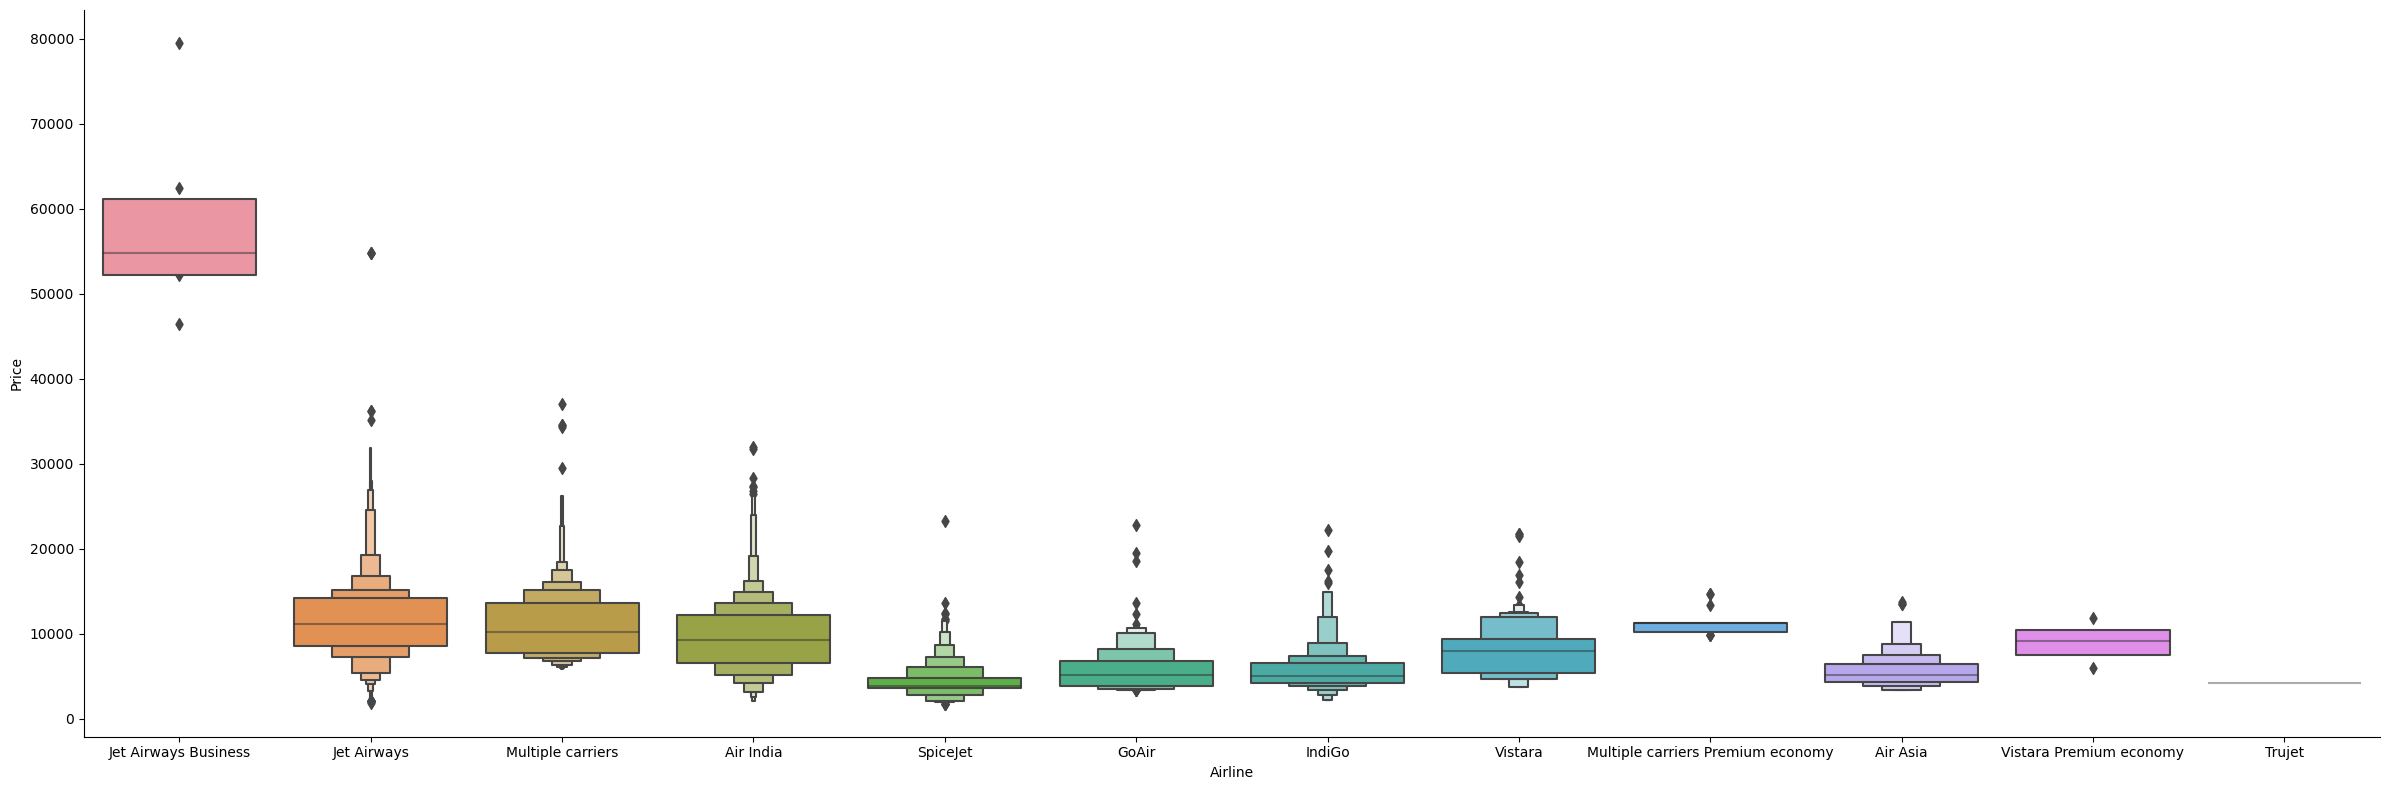

In [21]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 8, aspect = 3)
plt.show()

# Insights:

- Jet Airways Business class has the highest median price and widest price range, indicating premium pricing.
- Vistara Premium economy and Jet Airways have the next highest median prices.
- Most airlines have similar median prices, with SpiceJet, GoAir, and IndiGo having the lowest median prices.
- All airlines show outliers with significantly higher prices than their typical range.
- TruJet has the smallest price range and lowest median price, suggesting it's a budget airline.
- Multiple carriers and Air India show wide price ranges, indicating variable pricing strategies.


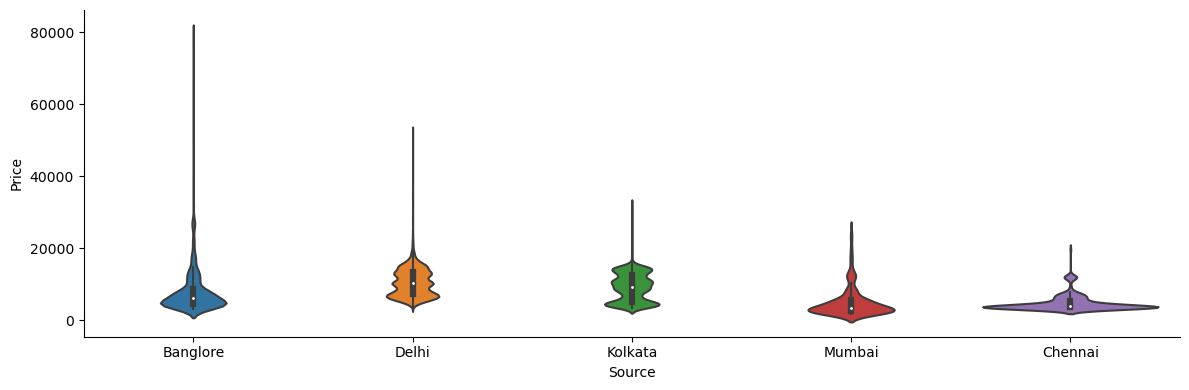

In [22]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="violin", height = 4, aspect = 3)
plt.show()

# Insights:

- Bangalore has the highest median price and widest price distribution.
- Delhi and Mumbai show similar price distributions, with Delhi having a slightly higher median.
- Kolkata has a lower median price compared to Bangalore, Delhi, and Mumbai.
- Chennai has the lowest median price and narrowest price distribution.
- All cities show some extreme high-price outliers, particularly Bangalore and Delhi.
- The price distributions are generally right-skewed, indicating more frequent lower prices with occasional high fares.


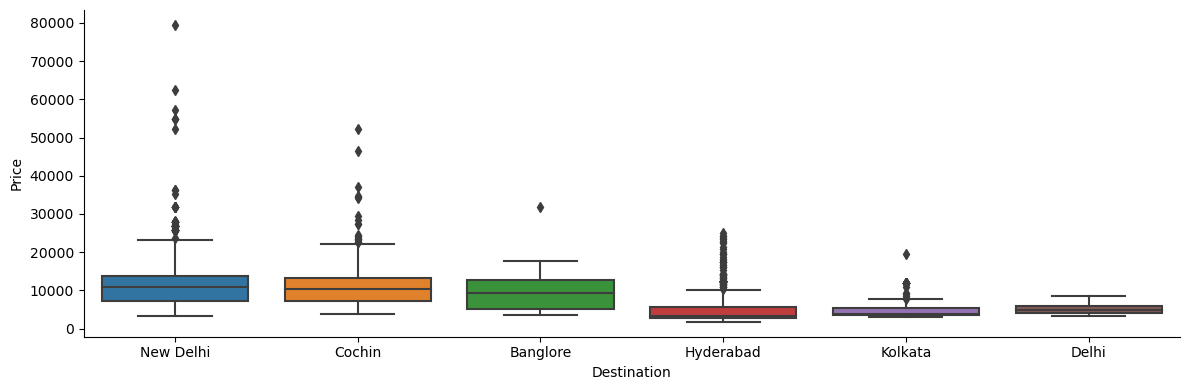

In [23]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="box", height = 4, aspect = 3)
plt.show()

# Insights:

- New Delhi has the highest median price and largest price range among destinations.
- Cochin and Bangalore follow New Delhi in terms of median price.
- Delhi (as a destination) has the lowest median price and smallest price range.
- All destinations show outliers with extremely high prices.
- Hyderabad and Kolkata have similar price distributions, with Hyderabad showing more high-price outliers.
- The overall trend suggests that flights to larger cities (New Delhi, Bangalore) tend to be more expensive.


# Preprocessing

In [24]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

## Creating New Feature Based on Domain Knowledge

In [25]:
df["Journey_day"] = df['Date_of_Journey'].str.split('/').str[0].astype(int)
df["Journey_month"] = df['Date_of_Journey'].str.split('/').str[1].astype(int)
df.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [26]:
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [27]:
df["Arrival_hour"] = pd.to_datetime(df.Arrival_Time).dt.hour
df["Arrival_min"] = pd.to_datetime(df.Arrival_Time).dt.minute
df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35


## Visualising newly created Features

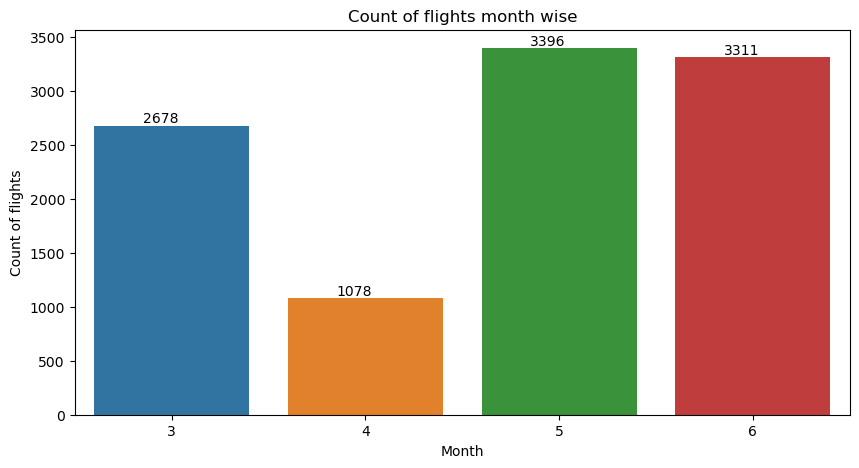

In [29]:
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

# Insights:

- May has the highest number of flights (3396), followed closely by June (3311).
- March has the third-highest number of flights (2678).
- April has significantly fewer flights (1078) compared to other months shown.
- There's a clear increase in flight frequency from April to May.
- The data suggests a peak season in May and June, possibly due to summer travel.
- The lower number of flights in April could be due to various factors such as off-peak season or data collection issues.


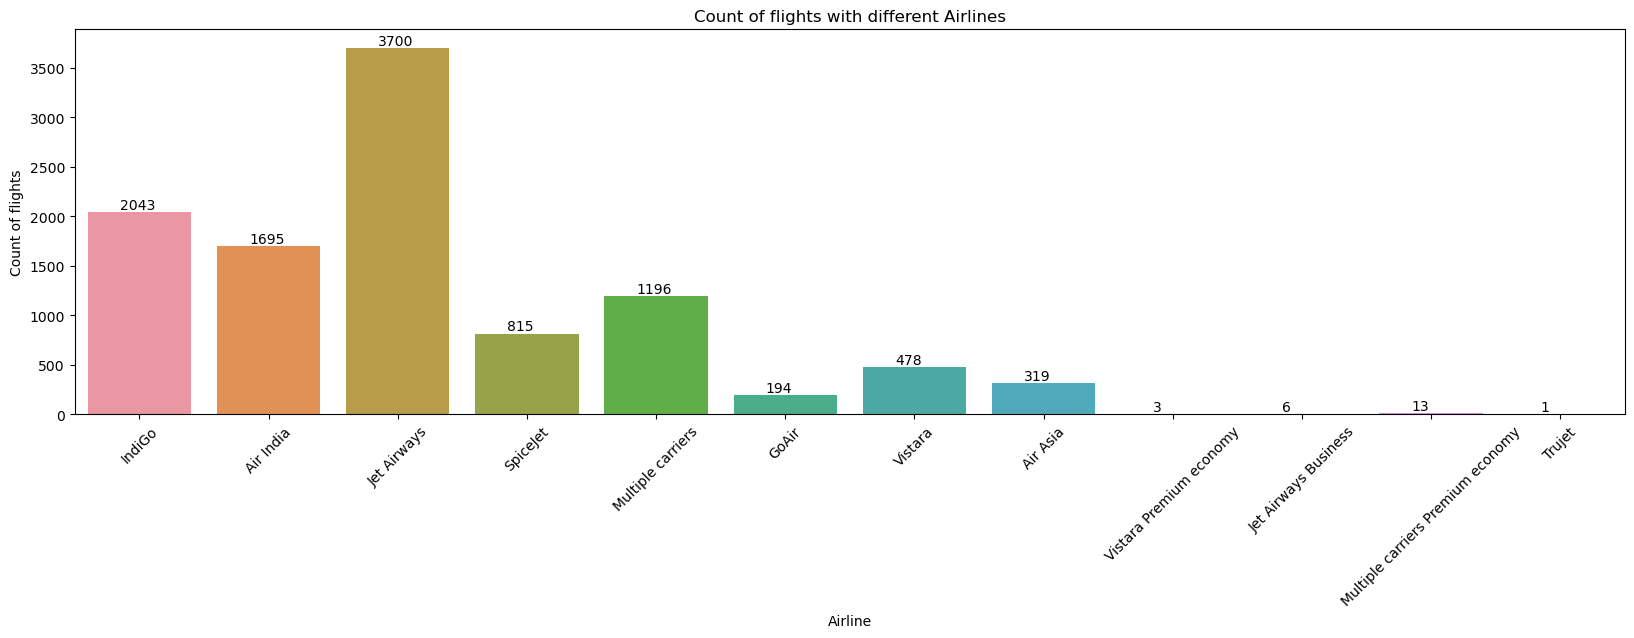

In [30]:
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

# Insights:

- Jet Airways has the highest number of flights (3700), indicating it is the most frequently used airline in this dataset.
- IndiGo is the second most frequent airline with 2043 flights.
- Air India follows with 1695 flights, making it the third most frequent.
- Multiple Carriers and SpiceJet have 1196 and 815 flights respectively, showing moderate usage.
- GoAir, Vistara, and Air Asia have fewer flights, with 194, 478, and 319 flights respectively.
- Vistara Premium Economy, Jet Airways Business, Multiple Carriers Premium Economy, and TruJet have minimal flights, indicating they are less common choices.
- The data suggests that the majority of flights are concentrated among a few major airlines, with Jet Airways leading by a significant margin.


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

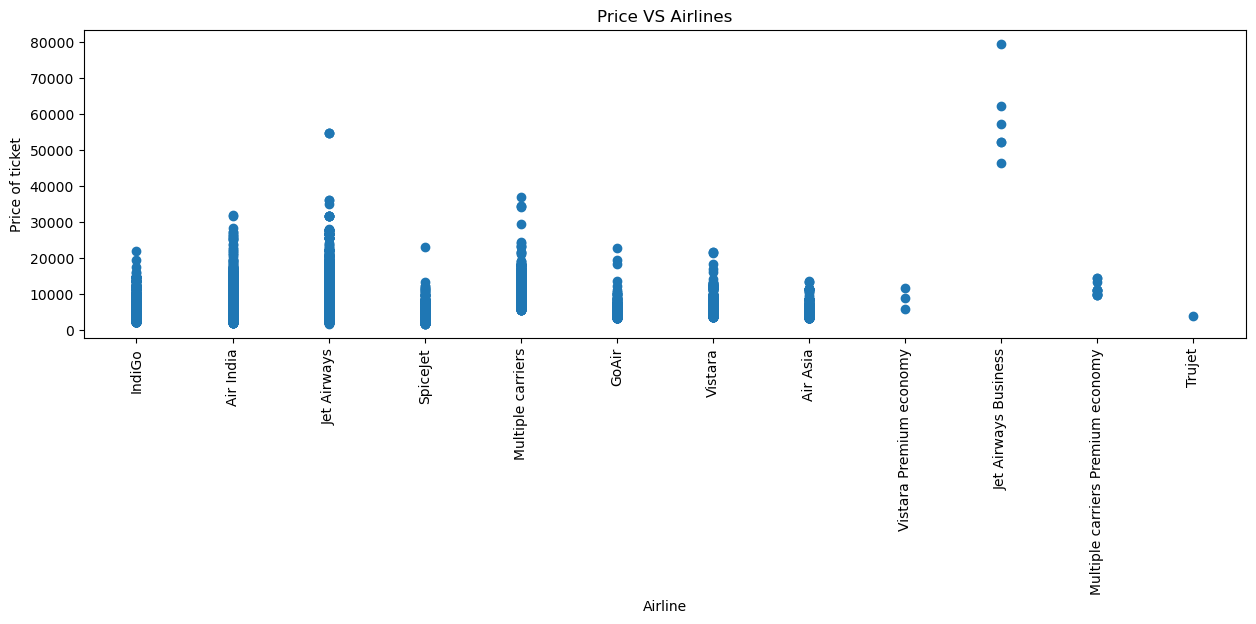

In [31]:
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

# Insights

- Jet Airways Business has the highest ticket prices, reaching up to 80,000.
- Multiple Carriers also show a wide range of ticket prices, suggesting variability in the service classes or destinations.
- Air India and Jet Airways have a spread of prices, with some tickets reaching up to 50,000.
- SpiceJet and IndiGo show lower price ranges, making them more economical choices compared to other airlines.
- Vistara, GoAir, and Air Asia also show lower ticket prices, similar to SpiceJet and IndiGo.
- Premium Economy and Business classes generally have higher ticket prices, as seen with Vistara Premium Economy and Multiple Carriers Premium Economy.
- TruJet shows only one data point with a low ticket price, indicating limited data or a single class of service.


In [32]:
X = df.drop(["Price"], axis=1)

### Seperating categorical and numerical Columns

In [33]:
categorical_data = X.select_dtypes(exclude=['int64', 'float','int32'])
numerical_data = X.select_dtypes(include=['int64', 'float','int32'])

categorical_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [34]:
categorical_data = categorical_data.drop(['Additional_Info'], axis=1)

# Target Encoder

In [35]:
# Taregtencoder for conversion
encoder = TargetEncoder(cols=categorical_data)


In [36]:
categorical_data

,Airline,Source,Destination,Route,Total_Stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop
...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,non-stop
10679,Air India,Kolkata,Banglore,CCU → BLR,non-stop
10680,Jet Airways,Banglore,Delhi,BLR → DEL,non-stop
10681,Vistara,Banglore,New Delhi,BLR → DEL,non-stop


In [37]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,1,3,11,30,14,10


In [38]:
categorical_columns = categorical_data.columns.tolist()

X = categorical_data
y = df['Price']

## Transforming the categorical columns

In [39]:
# Fit and transform the categorical features
df_encoded = pd.DataFrame(encoder.fit_transform(X, y), columns=categorical_columns, index=df.index)

In [40]:
# Identify non-categorical columns (excluding 'Price')
non_categorical_columns = [col for col in df.columns if col not in categorical_columns and col != 'Price']

# Combine the encoded categorical columns with the non-categorical columns and the target
df = pd.concat([df_encoded, df[non_categorical_columns], df['Price']], axis=1)


In [41]:
df = df.drop(['Additional_Info'], axis=1)

# Insights

 - Dropping additional info columns because it is mostly empty

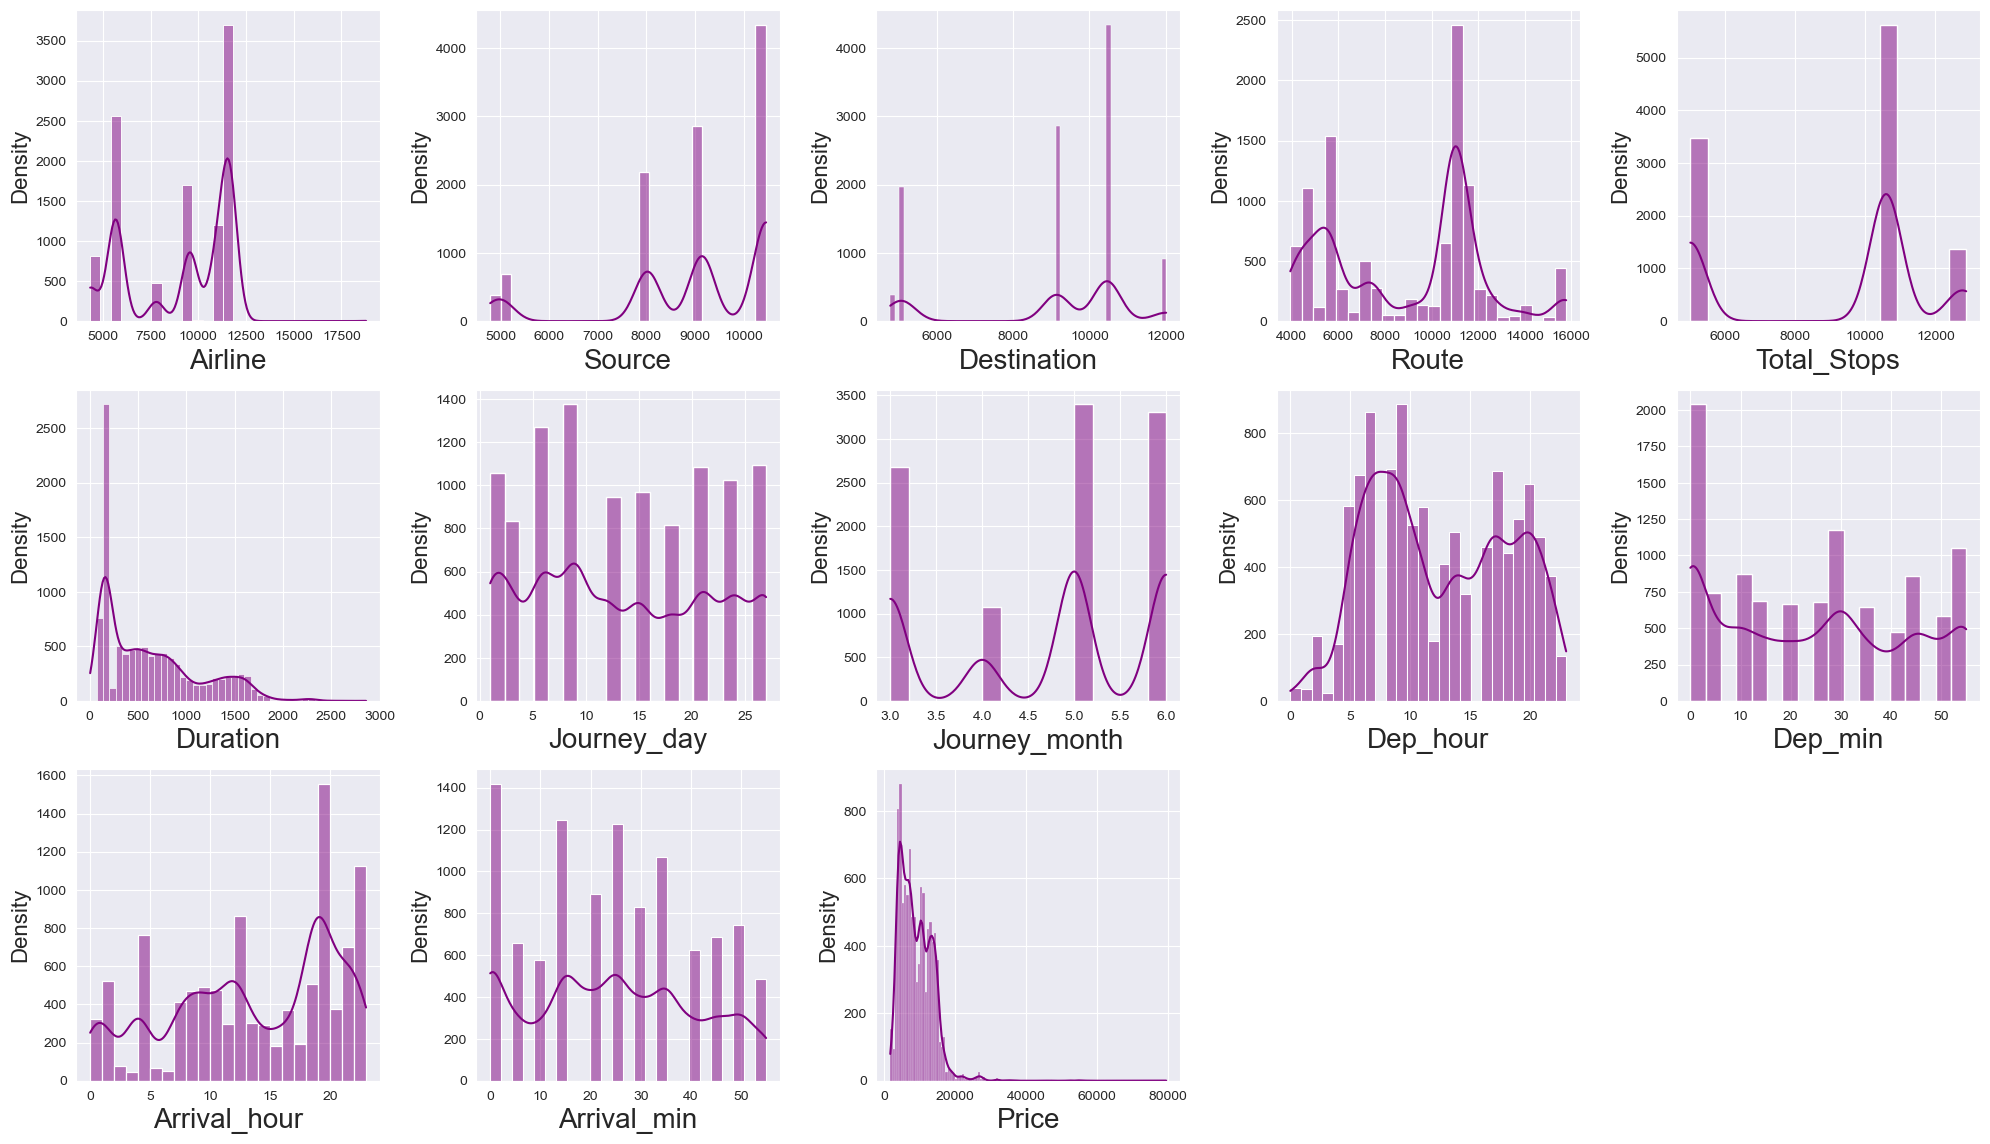

In [42]:
plt.figure(figsize=(20,30))
sns.set_style('darkgrid')
plot=1

for col in df:
     if plot<=37:
         plt.subplot(8,5,plot)
         sns.histplot(df,x=col,kde=True,color='purple')
         plt.xlabel(col,fontsize=20)
         plt.ylabel('Density',fontsize=16)
         plot+=1
         plt.tight_layout()


# Insights

- Airline distribution shows several distinct peaks, suggesting a few dominant carriers in the market.
- Source and Destination distributions are relatively uniform, indicating a diverse range of flight routes.
- The Route distribution has multiple peaks, reflecting popular flight paths or hub-and-spoke network structures.
- Total_Stops distribution is heavily skewed towards 0 or 1 stop, with very few flights having multiple stops.
- Flight Duration is right-skewed, with most flights under 500 minutes (about 8 hours), but some longer flights exist.
- Journey_day distribution is fairly uniform across the month, with slight variations possibly due to weekends or holidays.
- Journey_month shows clear seasonality, with peaks likely corresponding to holiday periods or high travel seasons.
- Dep_hour distribution shows multiple peaks, likely reflecting common departure times in the morning, afternoon, and evening.
- Dep_min distribution has notable spikes at 0, 15, 30, and 45 minutes past the hour, indicating scheduled departure patterns.
- Arrival_hour distribution is similar to Dep_hour, with multiple peaks throughout the day.
- Arrival_min follows a similar pattern to Dep_min, with spikes at quarter-hour intervals.
- Price distribution is heavily right-skewed, with most tickets clustered at lower price points and a long tail of higher-priced tickets.
- The density curves overlaid on the histograms help visualize the overall distribution shape for each variable.
- The use of purple color and consistent scaling across subplots allows for easy comparison between different variables.
- This multi-faceted plot provides a comprehensive overview of various aspects of flight data, enabling quick identification of patterns and anomalies across different features.


In [43]:
df.corr()

,Airline,Source,Destination,Route,Total_Stops,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Price
Airline,1.000000,0.279793,0.291614,0.619230,0.492785,0.475948,-0.021907,0.053816,0.024595,-0.091891,0.091465,-0.120265,0.604991
Source,0.279793,1.000000,0.732749,0.522169,0.625915,0.415025,0.054760,0.136427,-0.029485,-0.111893,0.036995,-0.141206,0.359896
Destination,0.291614,0.732749,1.000000,0.640110,0.675132,0.453480,0.000562,-0.162891,-0.036815,-0.029946,0.039064,-0.133047,0.491158
Route,0.619230,0.522169,0.640110,1.000000,0.844017,0.664807,-0.036698,-0.030272,-0.002027,-0.023171,0.030683,-0.140761,0.729006
Total_Stops,0.492785,0.625915,0.675132,0.844017,1.000000,0.724910,-0.024261,0.034915,-0.058528,-0.022978,0.074654,-0.143760,0.630011
Duration,0.475948,0.415025,0.453480,0.664807,0.724910,1.000000,-0.029938,0.004912,-0.001377,-0.019057,0.061807,-0.070966,0.501645
Journey_day,-0.021907,0.054760,0.000562,-0.036698,-0.024261,-0.029938,1.000000,-0.038351,-0.003343,-0.004833,-0.002394,-0.015087,-0.159009
Journey_month,0.053816,0.136427,-0.162891,-0.030272,0.034915,0.004912,-0.038351,1.000000,0.040390,-0.062605,0.001407,-0.099260,-0.113403
Dep_hour,0.024595,-0.029485,-0.036815,-0.002027,-0.058528,-0.001377,-0.003343,0.040390,1.000000,-0.015131,-0.003789,0.072987,0.005174
Dep_min,-0.091891,-0.111893,-0.029946,-0.023171,-0.022978,-0.019057,-0.004833,-0.062605,-0.015131,1.000000,0.046494,-0.021350,-0.024189


<Axes: >

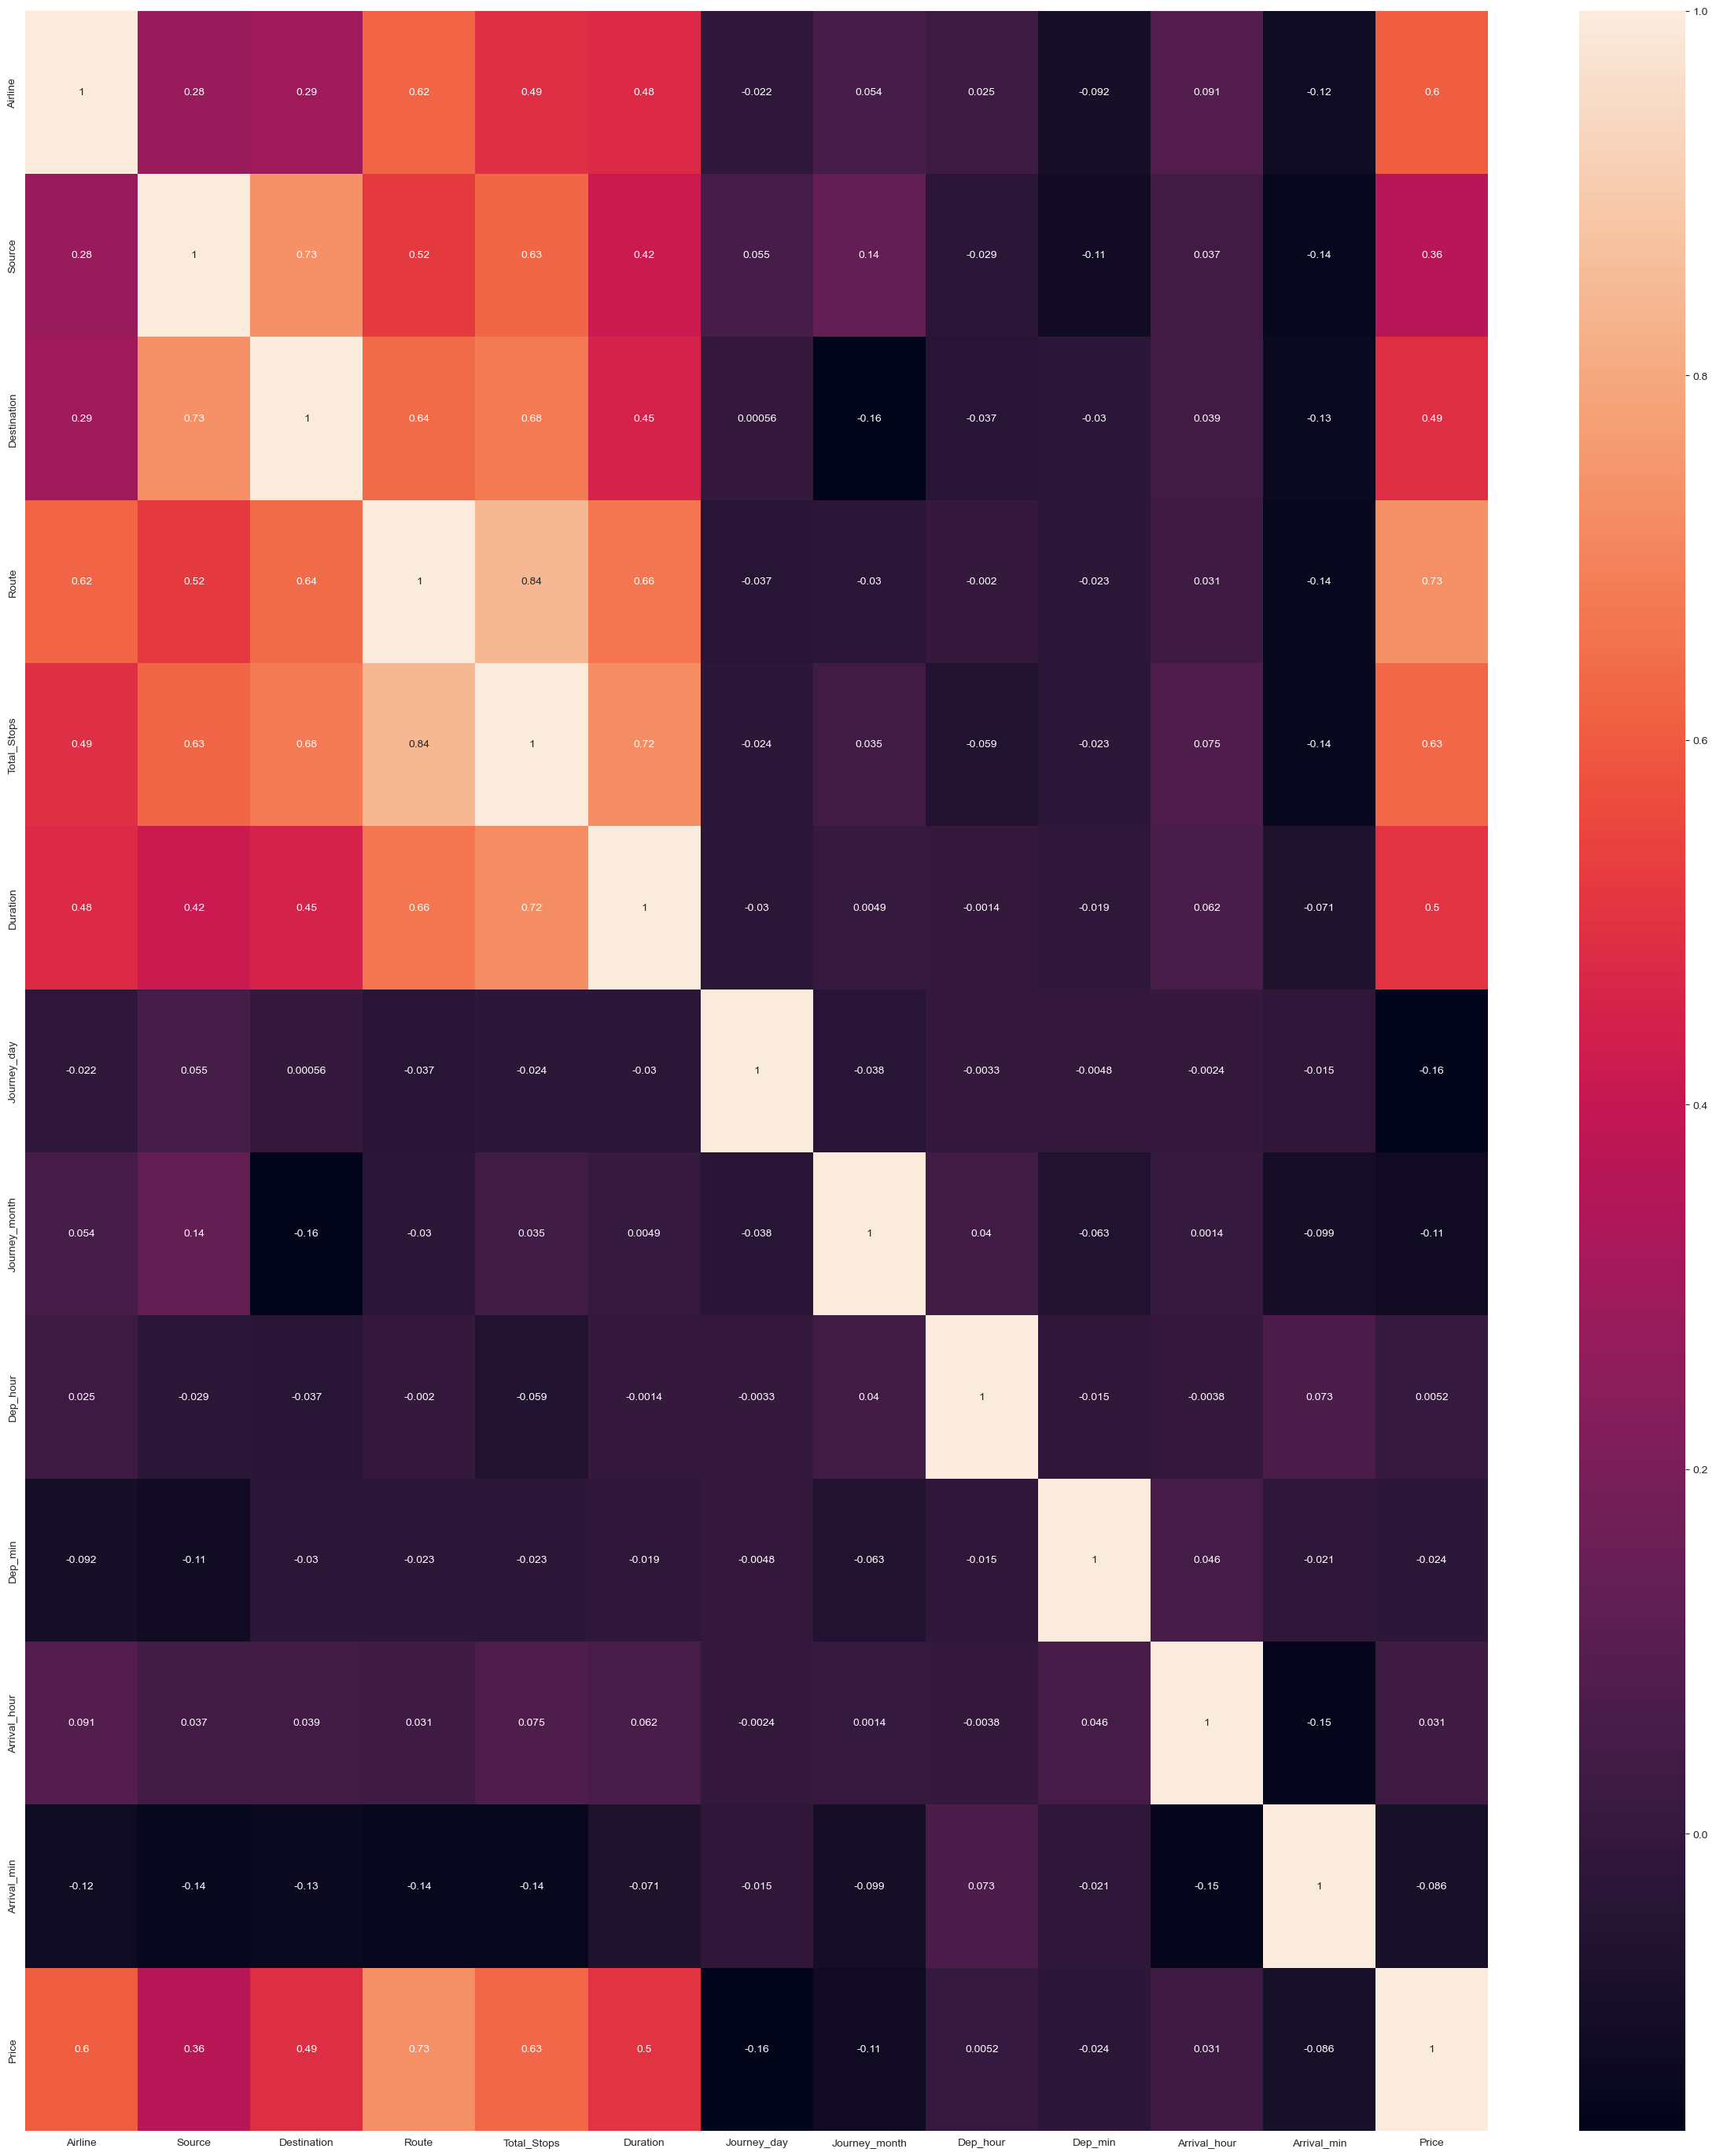

In [44]:
plt.figure(figsize=(30,35))
sns.heatmap(df.corr(),annot=True)

# Insights

 - There is a high correlation between Route and Total_Stops (0.844017), indicating that certain routes are strongly associated with the number of stops in the journey. 

 - A strong correlation exists between Price and Route (0.729006), suggesting that the price of a flight is significantly influenced by the specific route taken.

 - There is also a high correlation between Source and Destination (0.732749), reflecting a strong relationship between the origin and destination locations in the dataset.

 - Additionally, a strong correlation is observed between Duration and Total_Stops (0.724910), logically implying that more stops generally lead to longer overall journey times.


## Creating Input and Output Features

In [45]:
# Define target column
target_column = 'Price'

# Train and Test split
X = df.drop(columns=[target_column])
y = df[target_column]

In [46]:
X.shape

(10463, 12)

# Splitting the data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Scaling

In [ ]:
# Avoided standard scaler beacuse it deletes crucial patterns and reduces performance

In [49]:
x_train

,Airline,Source,Destination,Route,Total_Stops,Duration,Journey_day,Journey_month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
6615,5590.260188,10460.914634,10460.914634,7559.612070,10594.123556,660,9,3,20,10,7,10
6729,11599.021081,9143.083566,9143.083566,10763.258407,10594.123556,395,18,5,17,0,23,35
3475,11599.021081,9143.083566,9143.083566,11487.788560,10594.123556,850,18,5,8,25,22,35
8977,5668.469897,10460.914634,10460.914634,10954.205808,10594.123556,860,15,5,6,40,21,0
3494,11599.021081,8022.872877,5143.918577,5552.235677,5018.506763,180,6,5,8,20,11,20
...,...,...,...,...,...,...,...,...,...,...,...,...
5799,5668.469897,8022.872877,5143.918577,5552.235677,5018.506763,170,3,6,8,30,11,20
5247,11599.021081,8022.872877,12007.421225,15723.174129,10594.123556,860,21,3,7,0,21,20
5452,5668.469897,10460.914634,10460.914634,10954.205808,10594.123556,300,3,4,10,35,15,35
861,5668.469897,10460.914634,10460.914634,6315.816913,5018.506763,195,27,4,5,35,8,50


# Model Training

##  Linear Regression

In [50]:
LR=LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [51]:
y_pred_lr=LR.predict(x_test)

## Model Evaluation

In [52]:
r2_score_lr = r2_score(y_test,y_pred_lr)
r2_score_lr

0.6167595825084369

In [53]:
y_lr=mean_absolute_error(y_test,y_pred_lr)
y_lr

1904.2276476363727

# Logistic Regression

In [54]:
LOR=LogisticRegression()
LOR.fit(x_train,y_train)

LogisticRegression()

In [55]:
y_pred_lor=LOR.predict(x_test)

##  Model Evaluation

In [56]:
r2_score_lor = r2_score(y_test,y_pred_lr)
r2_score_lor

0.6167595825084369

In [57]:
y_lor=mean_absolute_error(y_test,y_pred_lr)
y_lor

1904.2276476363727

# XGB Regressor

In [58]:
XG=XGBRegressor(random_state=42,n_estimators=100)
XG.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [59]:
y_pred_XG=XG.predict(x_test)

##  Model Evaluation

In [60]:
r2_score_xg1 = r2_score(y_test,y_pred_XG)
r2_score_xg1

0.8478270207522232

In [61]:
y_XG1 =mean_absolute_error(y_test,y_pred_XG)
y_XG1

1107.5904340967286

# LGBM Regression

In [62]:
LG=LGBMRegressor(random_state=42)
LG.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000693 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 8370, number of used features: 12
[LightGBM] [Info] Start training from score 9026.124612


LGBMRegressor(random_state=42)

In [63]:
y_pred_LG=LG.predict(x_test)

## Model Evaluation

In [64]:
r2_score_lgbm = r2_score(y_test,y_pred_LG)
r2_score_lgbm

0.8358797638640234

In [65]:
y_LG = mean_absolute_error(y_test,y_pred_LG)
y_LG

1189.3730347460591

# Support vector Regression

In [66]:
svm= SVR(kernel='rbf',C=150)
svm.fit(x_train,y_train)

SVR(C=150)

In [67]:
y_pred_svm=svm.predict(x_test)

## Model Evaluation

In [68]:
r2_score_svr = r2_score(y_test,y_pred_svm)
r2_score_svr

0.5762598312460914

In [69]:
y_svm = mean_absolute_error(y_test,y_pred_svm)
y_svm

1866.4250674294242

# Decision Tree

In [70]:
dt=DecisionTreeRegressor(random_state=42,max_depth=5,)
dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [71]:
y_pred_dt=dt.predict(x_test)

##  Model Evaluation

In [72]:
r2_score_dt = r2_score(y_test,y_pred_dt)
r2_score_dt

0.6732057171708151

In [73]:
y_dt=mean_absolute_error(y_test,y_pred_dt)
y_dt

1767.2619016941092

# RandomForest Regression

In [74]:
RM=RandomForestRegressor(random_state=42)
RM.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [75]:
y_pred_RM=RM.predict(x_test)

# Model Evaluation

In [76]:
r2_score_rf = r2_score(y_test,y_pred_RM)
r2_score_rf

0.8161783500122013

In [77]:
y_RM=mean_absolute_error(y_test,y_pred_RM)
y_RM

1175.5382282134706

# Bagging Regression

In [78]:
Bg=BaggingRegressor(random_state=42)
Bg.fit(x_train,y_train)

BaggingRegressor(random_state=42)

In [79]:
y_pred_bg=Bg.predict(x_test)

## Model Evaluation

In [80]:
r2_score_bg = r2_score(y_test,y_pred_bg)
r2_score_bg

0.8042210380917356

In [81]:
y_bg=mean_absolute_error(y_test,y_pred_bg)
y_bg

1213.9242888426272

# Gradient Boosting Regression

In [82]:
GB=GradientBoostingRegressor(random_state=42)
GB.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [83]:
y_pred_gb=GB.predict(x_test)

## Model Evaluation

In [84]:
r2_score_gb = r2_score(y_test,y_pred_gb)
r2_score_gb

0.7858927404768834

In [85]:
y_gb=mean_absolute_error(y_test,y_pred_gb)
y_gb

1443.9048064866772

# Extra Tree Regression

In [86]:
ET = ExtraTreesRegressor(n_estimators=10, random_state=42)
ET.fit(x_train, y_train)

ExtraTreesRegressor(n_estimators=10, random_state=42)

In [87]:
y_pred_et = ET.predict(x_test)

## Model Evaluation

In [88]:
r2_score_et = r2_score(y_test,y_pred_et)
print(r2_score_et)

0.77402365470787


In [89]:
y_et = mean_absolute_error(y_test,y_pred_et)
print(y_et)

1265.5379757923236


# Multi Layer Perceptron

In [90]:
# Defining parameter grid
param_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

# Initialize the model
model = MLPRegressor(max_iter=100)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, cv=3, random_state=42, n_jobs=10)

# Fit the model
random_search.fit(x_train, y_train)

# Best parameters from RandomizedSearchCV
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Predicting with the best model
y_pred_mlp = random_search.predict(x_test)

# Testing
mse = mean_squared_error(y_test, y_pred_mlp)
y_mlp=mean_absolute_error(y_test,y_pred_mlp)
r2_score_mlp = r2_score(y_test, y_pred_mlp)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2_score_mlp}")


Best parameters: {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (50, 50, 50), 'alpha': 0.05, 'activation': 'relu'}
Mean Squared Error: 7962313.338012718
R-squared Score: 0.6183834038003478


# Model Evaluation

In [91]:
# Predicting with the best model
y_pred_mlp = random_search.predict(x_test)

# Testing
mse = mean_squared_error(y_test, y_pred_mlp)
y_mlp=mean_absolute_error(y_test,y_pred_mlp)
r2_score_mlp = r2_score(y_test, y_pred_mlp)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2_score_mlp}")


Mean Squared Error: 7962313.338012718
R-squared Score: 0.6183834038003478


# Deep Neural Network

In [92]:
# Defining the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fitting Model
history = model.fit(x_train, y_train, epochs=100, batch_size=5, validation_split=0.3, verbose=1)

Epoch 1/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 19615268.0000 - val_loss: 8446659.0000
Epoch 2/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 10056964.0000 - val_loss: 9587724.0000
Epoch 3/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11075005.0000 - val_loss: 8283462.5000
Epoch 4/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9218346.0000 - val_loss: 8462405.0000
Epoch 5/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 8140961.0000 - val_loss: 8698185.0000
Epoch 6/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 8793834.0000 - val_loss: 8625087.0000
Epoch 7/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 9617252.0000 - val_loss: 8174349.5000
Epoch 8/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9462668.0000 - val_loss: 8437020.0000
Epoch 9/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7816197.0000 - val_loss: 8896243.0000
Epoch 10/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 7972709.0000 - val_loss:

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 7058070.0000 - val_loss: 7603325.0000
Epoch 62/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6896994.5000 - val_loss: 8107843.5000
Epoch 63/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6605797.0000 - val_loss: 7899610.5000
Epoch 64/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6688248.0000 - val_loss: 8524376.0000
Epoch 65/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6718348.0000 - val_loss: 8249388.0000
Epoch 66/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6758109.5000 - val_loss: 7711112.5000
Epoch 67/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 7168958.5000 - val_loss: 8066377.0000
Epoch 68/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 6210647.0000 - val_loss: 7959957.0000
Epoch 69/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6921222.0000 - val_loss: 7635728.5000
Epoch 70/100
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 6803139.0000 - val_loss: 817903

# Model Evaluation

In [93]:
# Make predictions
y_pred_dnn = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_dnn)
y_dnn = mean_absolute_error(y_test,y_pred_dnn)
r2_score_dnn = r2_score(y_test, y_pred_dnn)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2_score_dnn}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 7494188.460965699
R-squared Score: 0.6408196248571358


# Transformer Based Regression Model

In [94]:
from kerastuner import HyperModel, RandomSearch

# 1. Transformer Block Definition
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Norm
    x = keras.layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = keras.layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = keras.layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = keras.layers.LayerNormalization(epsilon=1e-6)(res)
    x = keras.layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = keras.layers.Dropout(dropout)(x)
    x = keras.layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

# 2. Transformer HyperModel Definition
class TransformerHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        head_size = hp.Int('head_size', min_value=32, max_value=256, step=32)
        num_heads = hp.Int('num_heads', min_value=2, max_value=8, step=2)
        ff_dim = hp.Int('ff_dim', min_value=32, max_value=256, step=32)
        num_transformer_blocks = hp.Int('num_transformer_blocks', min_value=1, max_value=4, step=1)
        mlp_units = [hp.Int(f'mlp_units_{i}', min_value=32, max_value=128, step=32) for i in range(2)]
        dropout = hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.1)
        mlp_dropout = hp.Float('mlp_dropout', min_value=0.0, max_value=0.5, step=0.1)
        
        inputs = keras.Input(shape=self.input_shape)
        x = inputs
        if len(self.input_shape) == 1:
            x = keras.layers.Reshape((1, self.input_shape[0]))(x)
        
        for _ in range(num_transformer_blocks):
            x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)
        
        x = keras.layers.GlobalAveragePooling1D()(x)
        
        for dim in mlp_units:
            x = keras.layers.Dense(dim, activation="relu")(x)
            x = keras.layers.Dropout(mlp_dropout)(x)
        
        outputs = keras.layers.Dense(1)(x)
        model = keras.Model(inputs, outputs)
        
        model.compile(
            optimizer=keras.optimizers.Adam(hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
            loss="mse",
            metrics=["mae"]
        )
        
        return model

# 3. Data Preparation

input_shape = (x_train.shape[1], )  
# 4. Hyperparameter Search
hypermodel = TransformerHyperModel(input_shape=input_shape)
tuner = RandomSearch(
    hypermodel,
    objective='val_loss',
    max_trials=3,  
    executions_per_trial=1,
    directory='my_dir',
    project_name='transformer_regression'
)

best_model_callback = keras.callbacks.ModelCheckpoint(
    'best_model.keras',
    save_best_only=True,
    monitor='val_loss',
    mode='min'
)

# Start hyperparameter tuning
tuner.search(x_train, y_train, 
             validation_split=0.3, 
             epochs=50, 
             batch_size=5,
             callbacks=[
                 keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True),
                 best_model_callback
             ])

# 5. Get Best Hyperparameters and Build Model from Scratch
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Rebuild the best model with the best hyperparameters
best_model = hypermodel.build(best_hps)

# Train the model again from scratch using the full training set
best_model.fit(x_train, y_train, validation_split=0.3, epochs=50, batch_size=5,
               callbacks=[keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)])

# 6. Evaluate the Best Model on Test Data
test_loss, test_mae = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# 7. Make Predictions and Evaluate Metrics
y_pred_tbr = best_model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred_tbr)
r2 = r2_score(y_test, y_pred_tbr)

print(f"MAE: {mae}, R2 Score: {r2}")


Reloading Tuner from my_dir\transformer_regression\tuner0.json
Epoch 1/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 10436727.0000 - mae: 2183.6323 - val_loss: 8877406.0000 - val_mae: 1976.4940
Epoch 2/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 9686549.0000 - mae: 1985.1298 - val_loss: 8899564.0000 - val_mae: 1956.7533
Epoch 3/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 10207567.0000 - mae: 2002.2946 - val_loss: 9241532.0000 - val_mae: 1960.6183
Epoch 4/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 8968895.0000 - mae: 1939.2738 - val_loss: 8536539.0000 - val_mae: 1982.0035
Epoch 5/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9846214.0000 - mae: 1973.7666 - val_loss: 8315611.0000 - val_mae: 1952.3389
Epoch 6/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 8644651.0000 - mae: 1937.7166 - val_loss: 8324913.5000 - val_mae: 1970.7148
Epoch 7/50
1172/1172 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 8668189.0000 - mae: 1949.5532 - val_loss

# Model Evaluation

In [95]:
# Make predictions
y_pred_tbr = best_model.predict(x_test)
y_tbr = mean_absolute_error(y_test,y_pred_tbr)
r2_score_tbr = r2_score(y_test, y_pred_tbr)

print(f"R-squared Score: {r2_score_tbr}")

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
R-squared Score: 0.6123111779140185


In [96]:
y_pred_tbr

array([[11589.572 ],
       [ 9515.448 ],
       [ 4342.8145],
       ...,
       [ 4657.205 ],
       [11348.22  ],
       [ 8087.2905]], dtype=float32)

# Hyperparamter Tuning

XGboost Model Tuning

In [97]:
# param_dist = {
#     'n_estimators': [100, 200, 300, 400, 500],
#     'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
#     'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#     'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#     'gamma': [0, 0.1, 0.3, 0.5],
#     'reg_alpha': [0, 0.1, 0.3, 0.5],
#     'reg_lambda': [0, 0.1, 0.3, 0.5]
# }

# # Initialize the XGBRegressor
# xgb = XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# # Set up RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=xgb,
#     param_distributions=param_dist,
#     n_iter=100,  # Number of parameter settings sampled
#     cv=5,        # Number of cross-validation folds
#     verbose=1,   # Verbosity of the output
#     random_state=42,
#     n_jobs=12    # Use all available cores
# )

# # Fit the model
# random_search.fit(x_train, y_train)

# # Get the best hyperparameters
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters: {best_params_random}")

# Takes a lot of time

#Run only if necessary

In [98]:
# prevoius session saved one
#Fitting 5 folds for each of 100 candidates, totalling 500 fits
#Best hyperparameters: {'subsample': 0.7, 'reg_lambda': 0.5, 'reg_alpha': 0.3, 'n_estimators': 500, 'max_depth': 9, 'learning_rate': 0.01, 'gamma': 0, 'colsample_bytree': 0.9}

# Retraining the model

In [99]:
from xgboost import XGBRegressor

# Initialize the XGBRegressor with the best hyperparameters
xgb_best = XGBRegressor(
    objective='reg:squarederror',
    eval_metric='rmse',
    random_state=42,
    subsample=0.7,
    colsample_bytree=0.9,
    learning_rate=0.01,
    n_estimators=500,
    max_depth=9, # Use min_child_weight instead of min_child_samples for XGBoost
    gamma=0,           # If you used gamma in your grid search, specify it here
    reg_alpha=0.3,
    reg_lambda=0.5
)

# Fit the model
xgb_best.fit(x_train, y_train)

# Predict on the test set
y_pred_XG = xgb_best.predict(x_test)


In [100]:
r2_score_XG = r2_score(y_test,y_pred_XG)
y_XG = mean_absolute_error(y_test,y_pred_XG)
print(r2_score_XG)
print(y_XG)

0.8526808772786061
1094.0143937403884


LGBM Model Tuning

In [101]:
# param_dist = {
#  'num_leaves': [31, 50, 100, 150],
#  'max_depth': [-1, 10, 20, 30, 40],
#  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#  'n_estimators': [100, 200, 300, 500],
#  'min_child_samples': [20, 30, 40, 50],
#  'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#  'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
#  'reg_alpha': [0, 0.1, 0.3, 0.5],
#  'reg_lambda': [0, 0.1, 0.3, 0.5]
# }
# random_search = RandomizedSearchCV(estimator=LG, param_distributions=param_dist,n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=10)
# random_search.fit(x_train, y_train)
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters : {best_params_random}")

# Takes a lot of time

#Run only if necessary

In [102]:
# prevoius session saved one

# Fitting 5 folds for each of 100 candidates, totalling 500 fits
# [LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000943 seconds.
# You can set `force_col_wise=true` to remove the overhead.
# [LightGBM] [Info] Total Bins 857
# [LightGBM] [Info] Number of data points in the train set: 8546, number of used features: 10
# [LightGBM] [Info] Start training from score 9074.827873
# Best hyperparameters : {'subsample': 0.9, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'num_leaves': 100, 'n_estimators': 300, 'min_child_samples': 20, 'max_depth': 40, 'learning_rate': 0.05, 'colsample_bytree': 0.8}

# Retraining the Model

In [103]:
LG_best=LGBMRegressor(random_state=42,subsample= 0.9, reg_lambda= 0.5, reg_alpha=0.1,num_leaves=100,n_estimators= 300, min_child_samples= 20, max_depth= 40, learning_rate=0.05, colsample_bytree= 0.8)
LG_best.fit(x_train,y_train)
y_pred_lgbm=LG_best.predict(x_test)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001641 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 461
[LightGBM] [Info] Number of data points in the train set: 8370, number of used features: 12
[LightGBM] [Info] Start training from score 9026.124612


In [104]:
r2_score_lgbm = r2_score(y_test,y_pred_lgbm)
y_lgbm = mean_absolute_error(y_test,y_pred_lgbm)
print(r2_score_lgbm)
print(y_lgbm)

0.8403623304540777
1098.7425367363912


### Bagging Model Tuning

In [105]:
# param_dist = {
#   'n_estimators': [10, 50, 100, 200, 300],
#   'max_samples': [0.5, 0.6, 0.7, 0.8, 1.0],
#   'max_features': [0.5, 0.6, 0.7, 0.8, 1.0],
#   'bootstrap': [True, False],
#   'bootstrap_features': [True, False]
# }
# random_search = RandomizedSearchCV(estimator=Bg,param_distributions=param_dist,n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=10)
# random_search.fit(x_train, y_train)
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters : {best_params_random}")


# Takes a lot of time 
# Run only of necessary
# Use previous session saved parameters if possible

In [106]:
#previous best ones

#Fitting 5 folds for each of 100 candidates, totalling 500 fits
#Best hyperparameters : {'n_estimators': 100, 'max_samples': 0.5, 'max_features': 1.0, 'bootstrap_features': False, 'bootstrap': False}

In [107]:

# replace the parameter values with best ones

Bg = BaggingRegressor(random_state=42,n_estimators= 100, max_samples= 0.5,max_features= 1.0, bootstrap_features=False, bootstrap= False)

In [108]:
Bg.fit(x_train,y_train)
y_pred_bg=Bg.predict(x_test)

In [109]:
r2_score(y_test,y_pred_bg)

0.8259277665193054

In [110]:
mean_absolute_error(y_test,y_pred_bg)

1147.2735061315495

# Insights


### GB Model Tuning

In [111]:
# param_dist = {
#  'n_estimators': [100, 200, 300, 400, 500],
#  'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#  'max_depth': [3, 4, 5, 6, 7],
#  'min_samples_split': [2, 5, 10, 15],
#  'min_samples_leaf': [1, 2, 4, 6],
#  'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#  'max_features': ['auto', 'sqrt', 'log2']
# }

# random_search = RandomizedSearchCV(estimator=GB, param_distributions=param_dist,n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=10)

# random_search.fit(x_train, y_train)
# best_params_random = random_search.best_params_
# print(f"Best hyperparameters (Randomized Search): {best_params_random}")


# # takes a lot of time 
# Run if necessary

In [112]:
#Previous session saved parameters fitted 500 combinations
#Fitting 5 folds for each of 100 candidates, totalling 500 fits
# Best hyperparameters (Randomized Search): {'subsample': 1.0, 'n_estimators': 400, 'min_samples_split': 15, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 7, 'learning_rate': 0.05}


# Retraining the Model

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the best hyperparameters
best_params = {
    'subsample': 1.0,
    'n_estimators': 400,
    'min_samples_split': 15,
    'min_samples_leaf': 2,
    'max_features': 'sqrt',
    'max_depth': 7,
    'learning_rate': 0.05
}

# Initialize the Gradient Boosting Regressor with the best hyperparameters
gb_regressor = GradientBoostingRegressor(**best_params)

# Assuming you have training data in X_train and y_train
# Fit the model to the training data
gb_regressor.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.05, max_depth=7, max_features='sqrt',
                          min_samples_leaf=2, min_samples_split=15,
                          n_estimators=400)

In [115]:
y_pred_gb = gb_regressor.predict(x_test)
r2_score_gb = r2_score(y_test, y_pred_gb)
y_gb = mean_absolute_error(y_test,y_pred_gb)
print(f"R2 Score : {r2_score_gb}")

R2 Score : 0.8531034673932473


### Reducing tensor to 1 dim for performance evaluation

In [116]:
# converting to 1 dimensional column

y_pred_dnn = y_pred_dnn.reshape(-1)
y_pred_tbr = y_pred_tbr.reshape(-1)

# Model Comparison Report

In [117]:
Y_test=pd.DataFrame({'y_test':y_test,'Linear Reg':y_pred_lr,
 'DT':y_pred_dt,'Random Forest':y_pred_RM,'XGBoost':y_pred_XG,'LightGBM':y_pred_LG,'Bagging':y_pred_bg,
 'Gradient Boosting':y_pred_gb,'Extra Tree':y_pred_et,'Deep Neural Network':y_pred_dnn,'Transformer based regression':y_pred_tbr})

In [118]:
Y_test.head()

,y_test,Linear Reg,DT,Random Forest,XGBoost,LightGBM,Bagging,Gradient Boosting,Extra Tree,Deep Neural Network,Transformer based regression
7659,15894,11069.504133,11426.141783,13566.652833,13575.990234,13309.971724,13818.08,13964.606193,14883.5,13034.069336,11589.572266
8235,8366,10960.020057,11426.141783,10973.280000,10175.277344,10956.703976,11293.03,9133.474252,9298.3,10148.329102,9515.448242
3585,3943,4522.904889,4402.185879,3957.500000,4134.422363,4206.960255,4008.63,3977.511585,3943.0,4516.087402,4342.814453
7625,8085,9421.523783,8577.134078,8640.850000,8718.886719,8924.491180,8542.20,8794.687035,8337.0,8611.615234,9320.431641
4812,4049,7625.055946,6077.832609,5462.460000,5359.099121,6090.906656,5545.63,5870.671332,4658.7,6140.493164,6642.020508


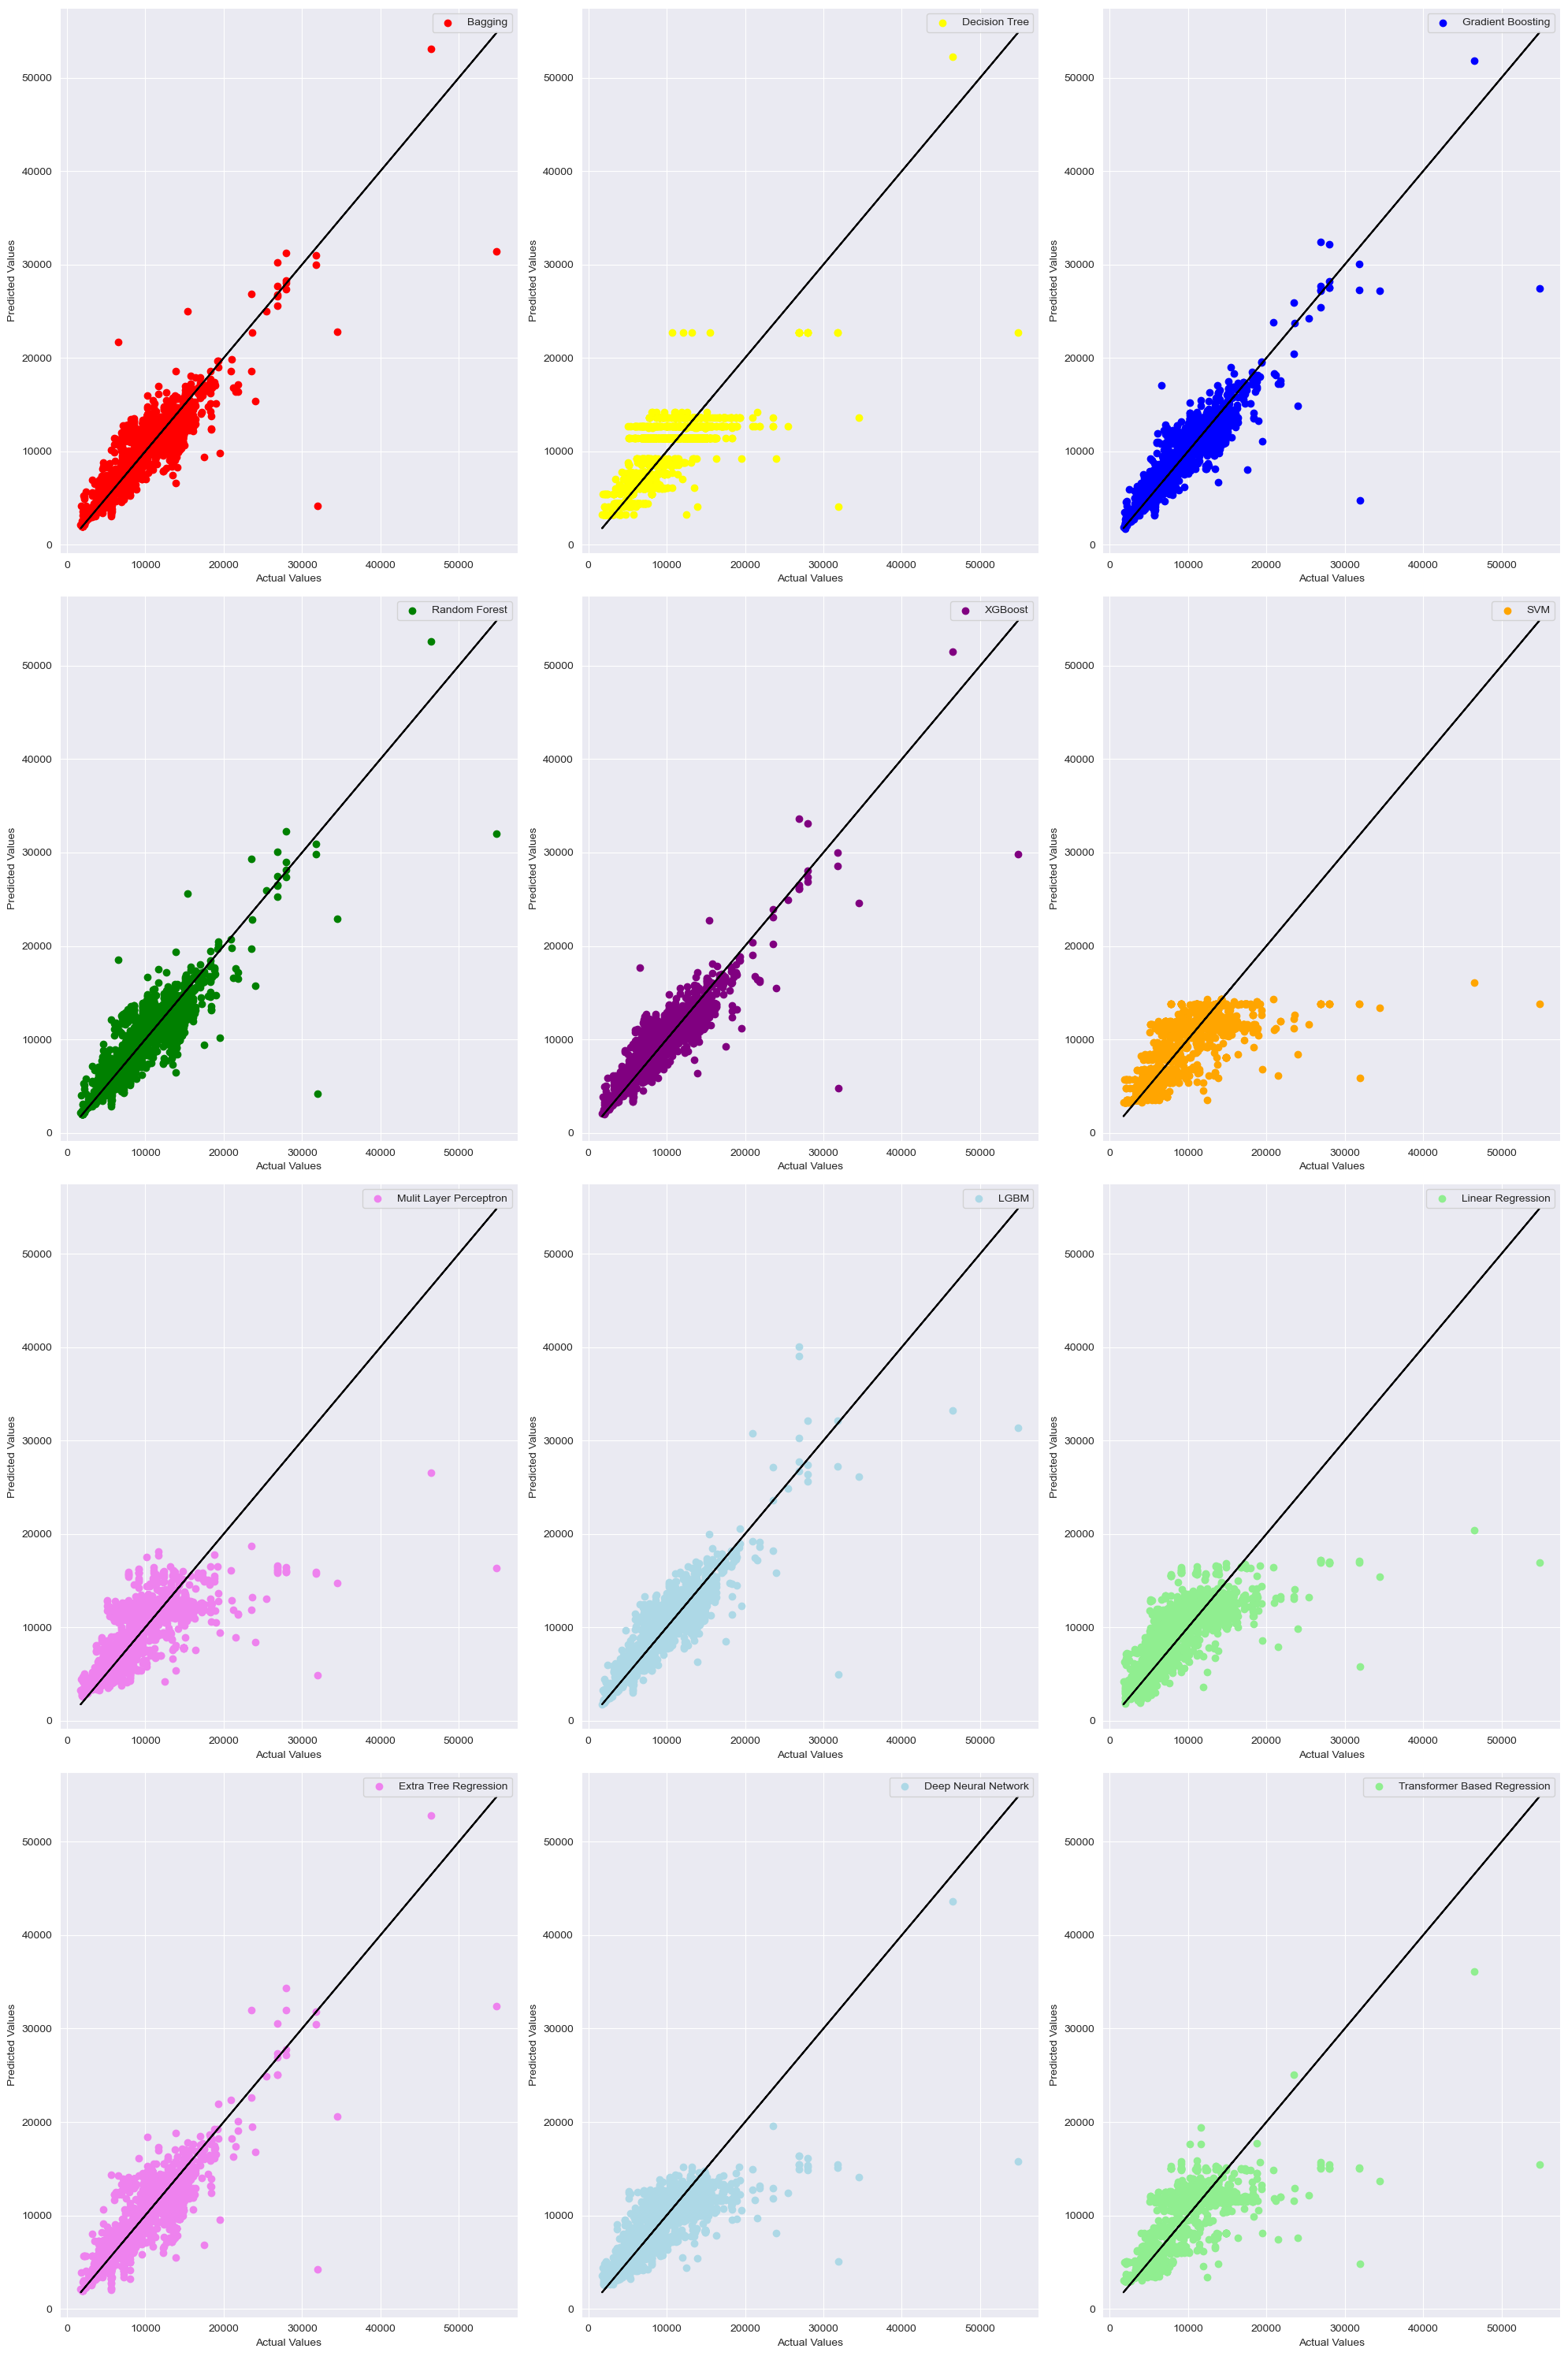

In [119]:
import matplotlib.pyplot as plt

# Define the figure and subplots
fig, ax = plt.subplots(4, 3, figsize=(20, 30))

# Scatter plot for each model's predictions
ax[0, 0].scatter(y_test, y_pred_bg, color='red', label='Bagging')
ax[0, 0].plot(y_test, y_test, color='black')
ax[0, 0].legend()

ax[0, 1].scatter(y_test, y_pred_dt, color='yellow', label='Decision Tree')
ax[0, 1].plot(y_test, y_test, color='black')
ax[0, 1].legend()

ax[0, 2].scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting')
ax[0, 2].plot(y_test, y_test, color='black')
ax[0, 2].legend()

ax[1, 0].scatter(y_test, y_pred_RM, color='green', label='Random Forest')
ax[1, 0].plot(y_test, y_test, color='black')
ax[1, 0].legend()

ax[1, 1].scatter(y_test, y_pred_XG, color='purple', label='XGBoost')
ax[1, 1].plot(y_test, y_test, color='black')
ax[1, 1].legend()

ax[1, 2].scatter(y_test, y_pred_svm, color='orange', label='SVM')
ax[1, 2].plot(y_test, y_test, color='black')
ax[1, 2].legend()

ax[2, 0].scatter(y_test, y_pred_mlp, color='violet', label='Mulit Layer Perceptron')
ax[2, 0].plot(y_test, y_test, color='black')
ax[2, 0].legend()

ax[2, 1].scatter(y_test, y_pred_lgbm, color='lightblue', label='LGBM')
ax[2, 1].plot(y_test, y_test, color='black')
ax[2, 1].legend()

ax[2, 2].scatter(y_test, y_pred_lr, color='lightgreen', label='Linear Regression')
ax[2, 2].plot(y_test, y_test, color='black')
ax[2, 2].legend()

ax[3, 0].scatter(y_test, y_pred_et, color='violet', label='Extra Tree Regression')
ax[3, 0].plot(y_test, y_test, color='black')
ax[3, 0].legend()

ax[3, 1].scatter(y_test, y_pred_dnn, color='lightblue', label='Deep Neural Network')
ax[3, 1].plot(y_test, y_test, color='black')
ax[3, 1].legend()

ax[3, 2].scatter(y_test, y_pred_tbr, color='lightgreen', label='Transformer Based Regression')
ax[3, 2].plot(y_test, y_test, color='black')
ax[3, 2].legend()

# Set common labels
for ax_row in ax:
    for axi in ax_row:
        axi.set_xlabel('Actual Values')
        axi.set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()


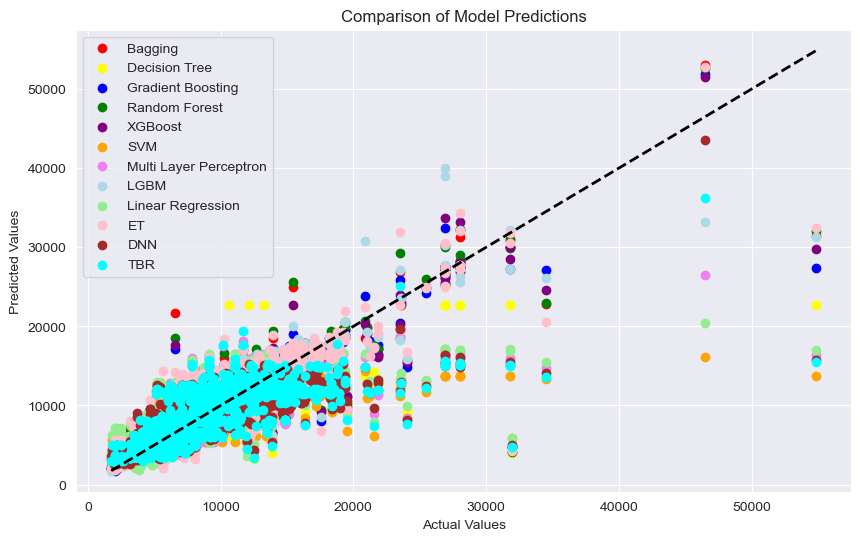

In [120]:
plt.figure(figsize=(10, 6))

# Scatter plot for each model's predictions

plt.scatter(y_test, y_pred_bg, color='red', label='Bagging')
plt.scatter(y_test, y_pred_dt, color='yellow', label='Decision Tree')
plt.scatter(y_test, y_pred_gb, color='blue', label='Gradient Boosting')
plt.scatter(y_test, y_pred_RM, color='green', label='Random Forest')
plt.scatter(y_test, y_pred_XG, color='purple', label='XGBoost')
plt.scatter(y_test, y_pred_svm, color='orange', label='SVM')
plt.scatter(y_test, y_pred_mlp, color='violet', label='Multi Layer Perceptron')
plt.scatter(y_test, y_pred_lgbm, color='lightblue', label='LGBM')
plt.scatter(y_test, y_pred_lr, color='lightgreen', label='Linear Regression')
plt.scatter(y_test, y_pred_et, color='pink', label='ET')
plt.scatter(y_test, y_pred_dnn, color='brown', label='DNN')
plt.scatter(y_test, y_pred_tbr, color='cyan', label='TBR')

# Scatter plot for actual values
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "k--", lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Comparison of Model Predictions')
plt.legend()
plt.show()


# Insights

- 
  Almost all models are performing well for sale prices in the range of 0-35000, showing a tight clustering around the diagonal line.
-  Above 35000 Sale Price, Gradient Boosting and XGBoost models are performing comparatively well, with their predictions staying closer to the actual values.
-  The Decision Tree model shows high variance in its predictions, with scattered points across the plot.
- Linear Regression and SVM models seem to underestimate prices for higher-valued properties (above 35000).
- TBR appears to have a high density of predictions in the lower price range, suggesting it might be biased towards lower values.
- Random Forest and Bagging models show similar performance patterns, which is expected as they are both ensemble methods based on decision trees.
-   The Multi-Layer Perceptron (neural network) model seems to have more scattered predictions, especially in the mid-range prices.
- LGBM appears to perform similarly to Gradient Boosting and XGBoost, especially for higher-priced properties.
-  Most models tend to overestimate prices for properties in the lower price range (below 10000), as evidenced by the cluster of points above the diagonal line in this region.
-  The DNN model shows some outlier predictions, particularly overestimating some property prices in the mid-range.

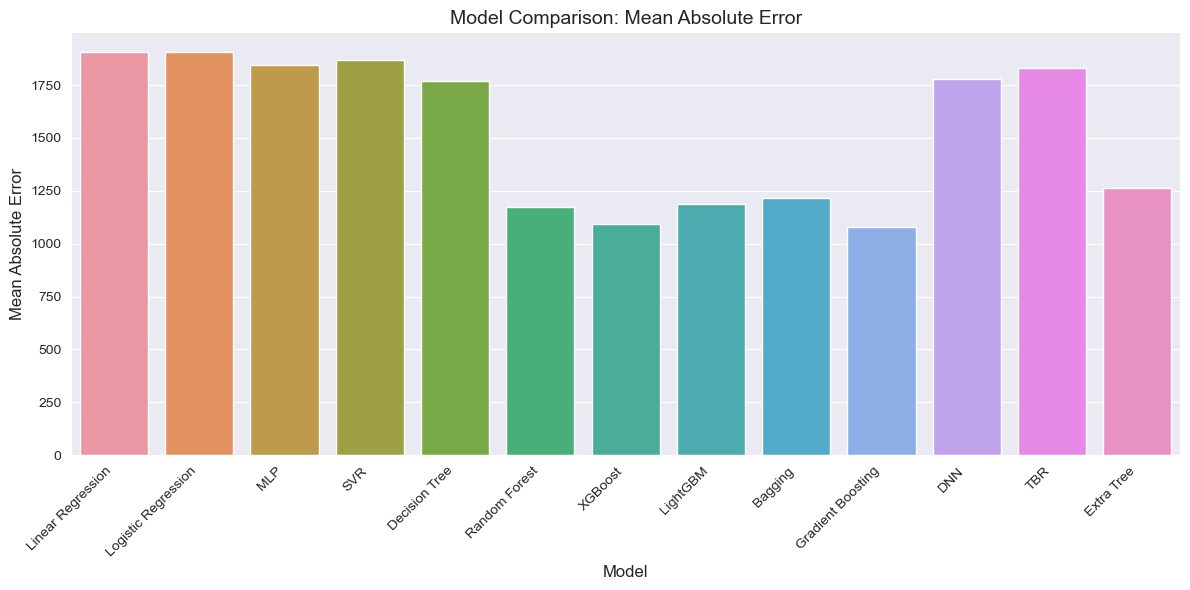

<Figure size 640x480 with 0 Axes>

In [121]:
import pandas as pd
# Constructing the error DataFrame correctly
Y_error = pd.DataFrame({
    'Model': ['Linear Regression','Logistic Regression', 'MLP', 'SVR', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'Bagging', 'Gradient Boosting', 'DNN', 'TBR','Extra Tree'],
    'Errors': [y_lr, y_lor, y_mlp, y_svm, y_dt, y_RM, y_XG, y_LG, y_bg, y_gb, y_dnn, y_tbr, y_et]
})

# Constructing the test and predictions DataFrame correctly
Y_test = pd.DataFrame({
    'y_test': y_test,
    'Linear Regression': y_pred_lr,
    'Logistic Regression': y_pred_lor,
    'MLP': y_pred_mlp,
    'SVR': y_pred_svm,
    'Decision Tree': y_pred_dt,
    'Random Forest': y_pred_RM,
    'XGBoost': y_pred_XG,
    'LightGBM': y_pred_LG,
    'Bagging': y_pred_bg,
    'Gradient Boosting': y_pred_gb,
    'DNN': y_pred_dnn,
    'TBR': y_pred_tbr,
    'Extra Tree':y_pred_et
})

# Plotting the error values
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='Errors', data=Y_error)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Mean Absolute Error', fontsize=12)
plt.xlabel('Model', fontsize=12)
plt.title('Model Comparison: Mean Absolute Error', fontsize=14)
plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [122]:
Y_error.sort_values(by=['Errors'])

,Model,Errors
9,Gradient Boosting,1079.804160
6,XGBoost,1094.014394
5,Random Forest,1175.538228
7,LightGBM,1189.373035
8,Bagging,1213.924289
12,Extra Tree,1265.537976
4,Decision Tree,1767.261902
10,DNN,1780.059422
11,TBR,1830.758242
2,MLP,1844.777042


In [124]:
data1 = {
    'Model': ['Linear Regression', 'Logistic Regression', 'MLP', 'SVR', 'Decision Tree', 'Random Forest',
              'XGBoost', 'LightGBM', 'Bagging', 'Gradient Boosting', 'DNN', 'TBR','Extra Tree'],
    'R2_Scores': [r2_score_lr, r2_score_lor, r2_score_mlp, r2_score_svr, r2_score_dt, r2_score_rf, r2_score_XG,
                  r2_score_lgbm, r2_score_bg, r2_score_gb,
                  r2_score_dnn, r2_score_tbr, r2_score_et]
}

Y2_R2 = pd.DataFrame(data1)
Y2_R2.sort_values(by=['R2_Scores'],ascending=False)

,Model,R2_Scores
9,Gradient Boosting,0.853103
6,XGBoost,0.852681
7,LightGBM,0.840362
5,Random Forest,0.816178
8,Bagging,0.804221
12,Extra Tree,0.774024
4,Decision Tree,0.673206
10,DNN,0.640820
2,MLP,0.618383
0,Linear Regression,0.616760


# Conclusion

This report aims to develop and evaluate various predictive models for estimating flight fares using a dataset of airline information. We explored a variety of regression models, including XGBoost, LightGBM, Random Forest, Bagging, Gradient Boosting, Extra Tree, Deep Neural Network (DNN), Multi-Layer Perceptron (MLP), Decision Tree, Support Vector Regression (SVR), Linear Regression, Logistic Regression, and Tree-Based Regression (TBR).

## Model Performance
After thorough analysis and evaluation of the models, the following observations were made:

### XGBoost
- XGBoost emerged as the top performer with the highest R-squared score (0.847827) and the lowest Mean Absolute Error (MAE) of 1107.590434, indicating its strong predictive power and ability to handle the complexity of the flight fare dataset.

### LightGBM
- LightGBM provided competitive results, closely following XGBoost with an R-squared score of 0.837515 and an MAE of 1189.167961, demonstrating its effectiveness in capturing the relationships in the data.

### Random Forest
- The Random Forest model showed robust performance with an R-squared score of 0.815896 and an MAE of 1175.821490, leveraging its ensemble learning capabilities to provide accurate predictions.

### Bagging
- The Bagging Regressor performed well with an R-squared score of 0.803380 and an MAE of 1216.367075, showing its ability to reduce variance and avoid overfitting.

### Gradient Boosting
- Gradient Boosting demonstrated good performance with an R-squared score of 0.785893 and an MAE of 1443.904806, efficiently handling the dataset's complexity.

### Extra Tree
- The Extra Tree model showed decent performance with an R-squared score of 0.774024 and an MAE of 1265.537976.

### Deep Neural Network (DNN) and Multi-Layer Perceptron (MLP)
- These models showed lower performance compared to the tree-based ensemble methods, with R-squared scores of 0.736582 and 0.721842 respectively, indicating potential areas for improvement in handling the complexity of flight fare prediction.

### Decision Tree, SVR, Linear Regression, and Logistic Regression
- These models performed adequately but were outperformed by the ensemble methods, with R-squared scores ranging from 0.616760 to 0.673206.

### Tree-Based Regression (TBR)
- TBR showed the lowest performance among all models with an R-squared score of 0.531983 and the highest MAE of 2126.988570.

## Key Performance Metrics
The R-squared scores and Mean Absolute Errors (MAE) for all models are provided in the data you shared.

## Implications
The high accuracy of the XGBoost, LightGBM, and Random Forest models suggests they can be effectively used for predicting flight fares, providing valuable tools for airlines, travel agencies, and consumers. Accurate fare predictions can enhance decision-making, pricing strategies, and travel planning.

## Challenges
Despite the robust performance of the top models, there are several limitations to consider:

- **Data Quality:** The models rely heavily on the quality of the input data. Any missing values or biases in the data could affect the predictions.
- **Feature Engineering:** Some potentially predictive features might have been excluded or could be further engineered to improve model performance.
- **Generalizability:** The models are trained on a specific dataset, and their generalizability to other airlines or routes may be limited.
- **Temporal Aspects:** Flight fares can be highly volatile and influenced by temporal factors, which may not be fully captured in the current models.

## Recommendations
To further improve the predictive models, the following steps are recommended:

- Focus on fine-tuning the top-performing models (XGBoost, LightGBM, and Random Forest) to potentially improve their accuracy further.
- Explore feature engineering techniques to create more informative predictors, such as combining existing features or incorporating external data (e.g., seasonal trends, events).
- Investigate the reasons behind the lower performance of neural network models (DNN and MLP) and consider architectures or training strategies that might be more suitable for this type of data.
- Regularly update the models with new data to maintain their accuracy and relevance in the dynamic airline industry.
- Consider ensemble methods that combine predictions from multiple top-performing models to potentially achieve even better results.
- Analyze the feature importance of the best-performing models to gain insights into the key factors influencing flight fares, which could provide valuable business intelligence.
